In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [2]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# parking-citations.csv has 8799051 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/los-angeles-parking-citations/parking-citations.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'parking-citations.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 22 columns


In [4]:
df1.head(5)

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,...,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Agency Description,Color Description,Body Style Description
0,1103341116,2015-12-21T00:00:00.000,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,01521,1,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN
1,1103700150,2015-12-21T00:00:00.000,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1C51,1,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN
2,1104803000,2015-12-21T00:00:00.000,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2R2,2,8939,WHITE CURB,58.0,6439997.9,1802686.4,NaN,NaN,NaN
3,1104820732,2015-12-26T00:00:00.000,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2F11,2,000,17104h,NaN,6440041.1,1802686.2,NaN,NaN,NaN
4,1105461453,2015-09-15T00:00:00.000,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1FB70,1,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,NaN,NaN,NaN


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


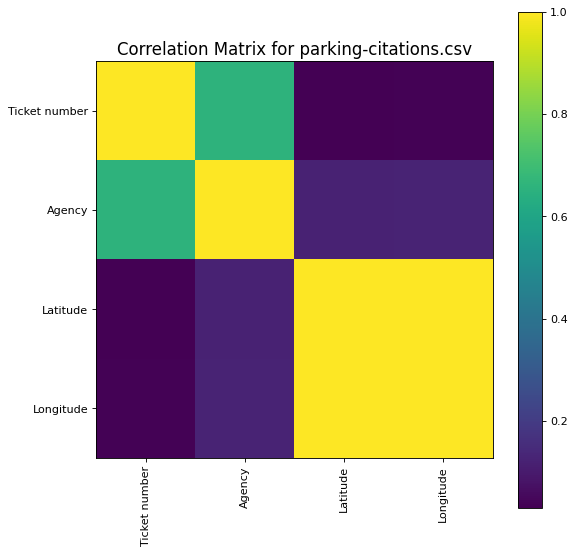

In [5]:
plotCorrelationMatrix(df1, 8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


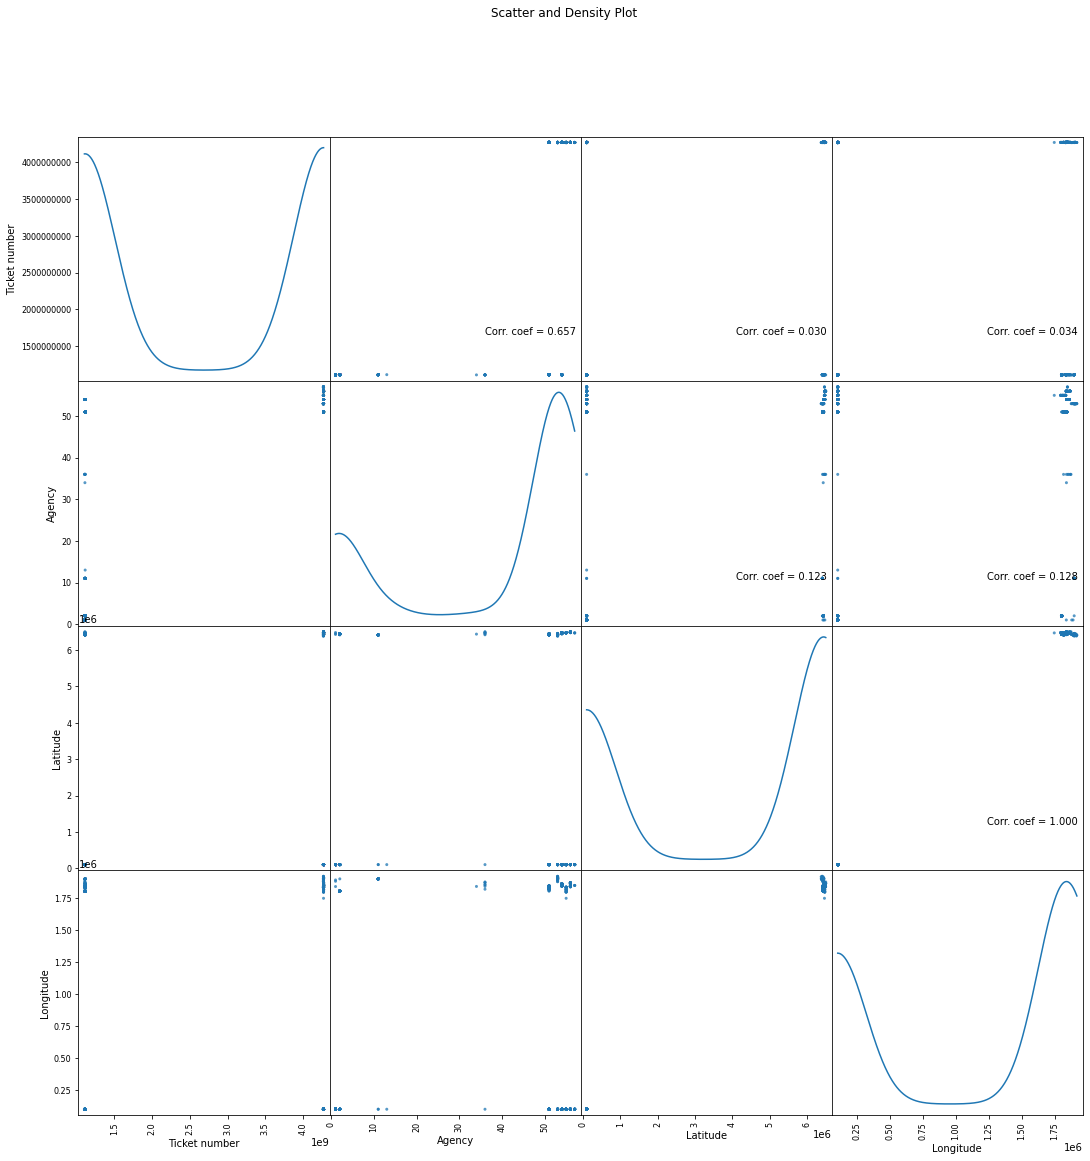

In [6]:
plotScatterMatrix(df1, 18, 10)